[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  2.  0. 20. 19. 18. 19. 20.  0.  0.]
 [ 0.  2.  1.  0. 19. 18. 17.  0.  0.  0.  0.]
 [ 0.  3.  2.  0.  0.  0. 16. 15.  0.  0.  0.]
 [ 0.  4.  3.  4.  5.  6.  0. 14.  0.  0.  0.]
 [ 0.  5.  4.  5.  0.  7.  0. 13.  0.  0.  0.]
 [ 0.  6.  5.  6.  0.  8.  0. 12.  0.  0.  0.]
 [ 0.  7.  6.  7.  0.  9. 10. 11.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


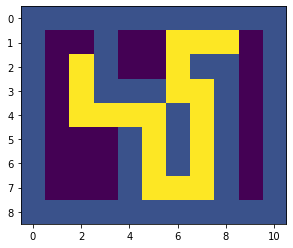

In [51]:
import numpy as np
import matplotlib.pyplot as plt
maze = np.array([
    [1,1,1,1,3,1,1,1,1,1,1],
    [1,0,0,1,0,0,1,0,1,0,1],
    [1,0,2,1,0,0,0,0,1,0,1],
    [1,0,0,1,1,1,1,0,1,0,1],
    [1,0,0,0,0,0,1,0,0,0,1],
    [1,0,0,0,0,0,1,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1],    
])
maze = np.array([
    [1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,3,0,1],
    [1,0,2,1,0,0,0,1,1,0,1],
    [1,0,0,1,1,1,0,0,1,0,1],
    [1,0,0,0,0,0,1,0,1,0,1],
    [1,0,0,0,1,0,1,0,1,0,1],
    [1,0,0,0,1,0,1,0,1,0,1],
    [1,0,0,0,1,0,0,0,1,0,1],
    [1,1,1,1,1,1,1,1,1,1,1],    
])

def fill(path, maze, k):
    # find k in the path, put k+1 around if there is no wall
    change = False
    for i in range(len(path)):
        for j in range(len(path[i])):
            if path[i][j] == k:
                if i>0 and maze[i-1][j]!=1 and path[i-1][j]==0:
                    path[i-1][j]=k+1
                    change = True
                if i<len(path)-1 and maze[i+1][j]!=1 and path[i+1][j]==0:
                    path[i+1][j]=k+1
                    change = True
                if j>0 and maze[i][j-1]!=1 and path[i][j-1]==0:
                    path[i][j-1]=k+1
                    change = True
                if j<len(path[i])-1 and maze[i][j+1]!=1 and path[i][j+1]==0:
                    path[i][j+1]=k+1
                    change = True       
    return change

path = np.zeros((len(maze),len(maze[0])))
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 2:
            sx,sy = i,j
        if maze[i][j] == 3:
            ex,ey = i,j
            
path[sx,sy] = 1
k = 1
while fill(path,maze,k) and path[ex][ey]==0:
    k+=1
    
if path[ex][ey]!=0:
    maze[ex][ey] = 4
    while path[ex][ey]!=1:
        if ex>0 and path[ex-1][ey] == path[ex][ey]-1:
            ex -= 1
        elif ex<len(path) and path[ex+1][ey] == path[ex][ey]-1:
            ex += 1
        elif ey>0 and path[ex][ey-1] == path[ex][ey]-1:
            ey -= 1
        elif ey<len(path[ex]) and path[ex][ey+1] == path[ex][ey]-1:
            ey += 1    
        maze[ex][ey] = 4
        
print(path)
plt.imshow(maze)
plt.show()